# 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Importing Data

In [6]:
# Importing data set zomato_numeric.csv
df_zomato_numeric = pd.read_csv(r'/Users/I589637/Documents/Zomato Analysis/02 - Data/Prepared Data/zomato_numeric.csv', index_col = False)

In [8]:
df_zomato_numeric

,Unnamed: 0,rate,votes,approx_cost_2ppl,cost_category,jitter
0,0,4.100000,775,800,medium,0.072980
1,1,4.100000,787,800,medium,0.037754
2,2,3.800000,918,800,medium,0.022184
3,3,3.700000,88,300,low,-0.036275
4,4,3.800000,166,600,medium,0.041291
...,...,...,...,...,...,...
51143,51143,3.600000,27,1500,high,0.071869
51144,51144,3.700449,0,600,medium,-0.009794
51145,51145,3.700449,0,2000,high,-0.092242
51146,51146,4.300000,236,2500,high,0.010244


# 3. Data Prep for Regression Analysis

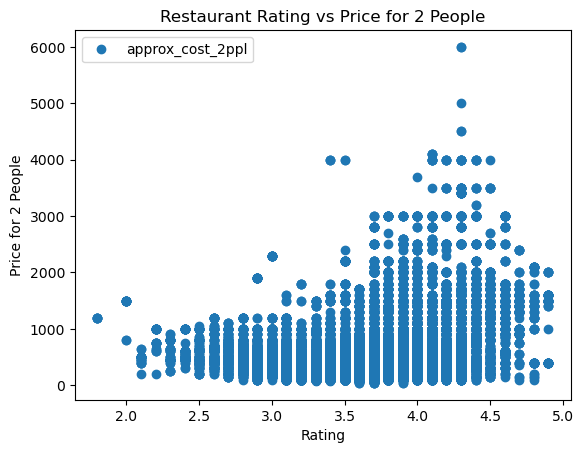

In [18]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_zomato_numeric.plot(x = 'rate', y='approx_cost_2ppl',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Restaurant Rating vs Price for 2 People')  
plt.xlabel('Rating')  
plt.ylabel('Price for 2 People')  
plt.show()

#### **Hypotheses:**

A) There is a positive linear relationship between restaurant ratings and cost for two people. Higher ratings are associated on average with higher prices (although this relationship might not be perfectly linear).

B) Possibility of a non-linear relationship, such as a polynomial regression model. (The scatterplot suggests some curvature rather than a straight line, especially at higher cost levels.)

C) Factors other than rating influence the cost, such as restaurant location, cuisine type, or service quality, which could lead to building a multivariate regression model.



#### **Observations:**

1. **Overall Trend**: There appears to be a general trend where higher-rated restaurants have a higher price range, although the relationship is not perfectly linear or tightly clustered.

2. **Variability**: The cost for two people varies significantly across different ratings, especially in the mid-range ratings (around 3.0 to 4.0), indicating that there are affordable as well as high-end options available for similar quality in terms of ratings.

3. **Clusters**: There is a concentration of data points between the ratings of 3.0 and 4.0, suggesting most restaurants fall within this average rating range, and within a cost range of approximately 500 to 2000.

4. **Outliers**: Some restaurants with high ratings have significantly higher costs, suggesting luxury or premium dining options. Similarly, there are data points with average ratings but high prices, which could indicate unique or specialty offerings that are not rated highly.

5. **Low-End**: Restaurants with lower ratings (2.0 to 3.0) tend to have lower prices, with most data points clustered in a lower price range (under 1000).

**Summary:**
The scatterplot suggests that while there is a tendency for restaurants with higher ratings to charge more, there is considerable variation, highlighting both affordable and expensive options across different ratings.

In [21]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df_zomato_numeric['rate'].values.reshape(-1,1)
y = df_zomato_numeric['approx_cost_2ppl'].values.reshape(-1,1)

In [25]:
X

array([[4.1       ],
       [4.1       ],
       [3.8       ],
       ...,
       [3.70044882],
       [4.3       ],
       [3.4       ]])

In [27]:
y

array([[ 800],
       [ 800],
       [ 800],
       ...,
       [2000],
       [2500],
       [1500]])

In [30]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [32]:
X_train

array([[3.5],
       [3.7],
       [4.6],
       ...,
       [3.8],
       [4.2],
       [4.4]])

In [34]:
X_test

array([[3.5       ],
       [3.8       ],
       [3.70044882],
       ...,
       [3.70044882],
       [4.1       ],
       [3.70044882]])

In [36]:
y_train

array([[ 200],
       [ 400],
       [1500],
       ...,
       [ 400],
       [ 650],
       [ 400]])

In [38]:
y_test

array([[ 500],
       [ 300],
       [ 800],
       ...,
       [ 400],
       [1200],
       [ 200]])

# 4. Regression Analysis

In [41]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [43]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [45]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

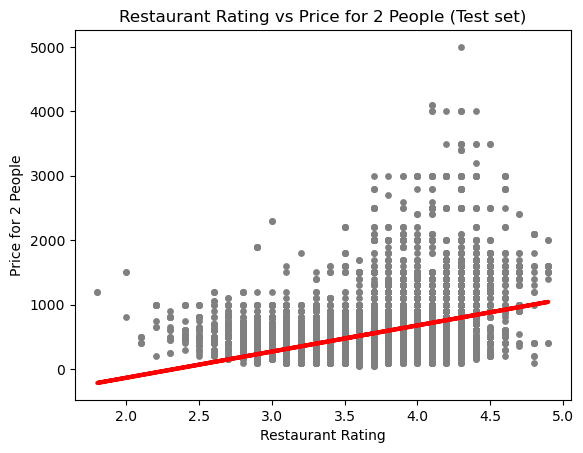

In [47]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Restaurant Rating vs Price for 2 People (Test set)')
plot_test.xlabel('Restaurant Rating')
plot_test.ylabel('Price for 2 People')
plot_test.show()

#### **Scatterplot Interpretation:**

**Regression Line**:
- The red line represents the linear regression model's prediction. It is fitted to show the relationship between restaurant rating and price for two people.
- The line's trajectory indicates a positive relationship between restaurant rating and price, suggesting that generally, as the restaurant rating increases, the price for two people also tends to increase.

**Trend Observation**:
- Despite the variability and dispersion of data points, the linear regression line captures an upward trend.
- However, the wide scatter of gray dots around the line, especially vertically, indicates a significant variability in prices that is not completely explained by ratings.

**Model Effectiveness**:
- The regression line does not perfectly fit all the data points, suggesting that other factors might also influence pricing along with restaurant rating. This variability can be indicative of either other contributing factors not included in the model or simply noise.

**Summary:**
Overall, this scatterplot shows that there is a general positive correlation between restaurant rating and price for two people on average, but the substantial scatter of the data points indicates there is a lot of variation and potentially other factors influencing prices.

#### **What does this mean for my Hypotheses?**

The scatterplot interpretation aligns with my hypotheses in the following ways:

A) **Positive Linear Relationship**:
   - The scatterplot suggests a **positive linear relationship** between restaurant ratings and the cost for two people, as evidenced by the upward trend of the regression line. This indicates that, on average, higher ratings are associated with higher prices.
   - However, the significant variability and dispersion around the line (as shown by the wide spread of gray dots) indicate that this relationship might not capture all complexities, suggesting the linear relationship isn't perfect. Hence, the data supports hypothesis A but also suggests that these conclusions should be made cautiously given the variability.

B) **Non-linear Relationship Possibility**:
   - The scatter of the dots, especially at higher price levels, might hint at the possibility of a **non-linear relationship**. If the data points exhibit curvature that the linear regression line fails to capture (which can sometimes be observed as increasing variability with higher ratings), it might be worth exploring models that account for non-linearity, such as polynomial regression.
   - The scatterplot suggests hypothesis B's possibility, as a straight line isn't perfectly aligned with all the data points, implying potential benefits of exploring non-linear modeling.

C) **Influence of Other Factors**:
   - The broad scatter of points across the plot indicates that factors beyond restaurant ratings likely influence the cost. This variability, not explained by ratings alone, supports the idea that other attributes such as location, cuisine, and service quality might play a role. Thus, developing a multivariate regression model could help capture these complexities.
   - This aligns with hypothesis C, as the scatterplot suggests substantial unexplained variance, which could be better addressed by including more variables into the model rather than relying solely on ratings.

**Summary:**
- The data supports a positive linear relationship (hypothesis A) but with significant variability.
- The scatter suggests exploring non-linear modeling (hypothesis B).
- The wide scatter indicates other factors should be considered in modeling (hypothesis C).

In [54]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [56]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[405.85103449]]
Mean squared error:  167759.77613076445
R2 score:  0.13696423850336692


In [61]:
y_predicted

array([[474.23575968],
       [595.99107002],
       [555.58811981],
       ...,
       [555.58811981],
       [717.74638037],
       [555.58811981]])

In [64]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,500,474.235760
1,300,595.991070
2,800,555.588120
3,550,677.161277
4,750,798.916587
5,700,271.310242
6,500,595.991070
7,300,677.161277
8,350,595.991070
9,400,474.235760


In [66]:
# Compare how the regression fits the training set
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [68]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [70]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[405.85103449]]
Mean squared error:  167040.0890543296
R2 score:  0.13315939561885826


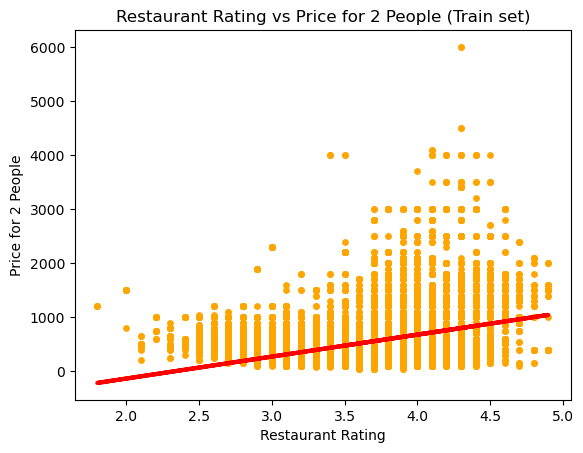

In [81]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='orange', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Restaurant Rating vs Price for 2 People (Train set)')
plot_test.xlabel('Restaurant Rating')
plot_test.ylabel('Price for 2 People')
plot_test.show()

### **Interpretation of the Training Set Scatterplot**:

**Regression Line**:
- The red line indicates the predictions of the linear regression model fitted over this training data. It shows a positive slope, suggesting that higher ratings are generally associated with higher prices.
- On the training set, the line aligns somewhat with the overall direction of the data points, demonstrating the model's fit.

**Trend and Variability**:
- While the regression line demonstrates an upward trend, indicating a positive relationship, the dots spread vertically indicates substantial variability.
- This variability suggests that the linear model does not fully account for the range of prices given a single rating value, captured by other potentially impactful factors.


### **Comparing Test and Training Sets**

**Slope**:
   - The slope is consistent between the test and training sets (`[[405.85103449]]`), indicating that the model is using the same linear coefficient for predictions in both datasets. This consistency is expected, as the model applies the same linear relationship learned from the training data to the test data.

**Mean Squared Error (MSE)**:
   - The MSE values for the test set (`167759.77613076445`) and the training set (`167040.0890543296`) are quite close.
   - The similarity suggests that the model performs similarly on both datasets, implying that there is no significant overfitting or underfitting. This is a positive sign that the model generalizes fairly from the training set to the test set, although the high MSE indicates that the predictions deviate substantially from the actual values.

**R² Score**:
   - The R² score is relatively low for both sets, with `0.13696423850336692` for the test set and `0.13315939561885826` for the training set. An R² score closer to 1 indicates a better fit, while scores close to 0 imply a poor fit.
   - The low R² scores indicate that the model explains only a small fraction of the variance in price based on restaurant ratings, suggesting that ratings are not a strong predictor of cost alone.
   - Again, the similarity between the training and test set scores indicates consistent performance across both datasets but highlights that the model overall is not very effective in capturing the underlying data patterns.



### **Conclusion On Model's Performance**:

**Fit on Training Data**:
- The model appears to describe an average upward trend in the training data, implying it has captured the general directional relationship between ratings and prices.
- However, the high variability and scattered distribution along the vertical axis indicate that the model might not capture all complexities or influential factors perfectly.

**Comparison to Test Data**:
- When comparing with the test set scatterplot, the training data shows a similar degree of variability around the regression line.
- Given the substantial scatter and overlap in both plots, the model's performance suggests limited predictive precision, particularly concerning nuances beyond a simplistic increase in average costs with higher ratings.



### **Overall Evaluation**:

- The linear regression model seems competent in establishing an average relationship but is relatively simplistic given the variability observed.
- There may be room for improvement by potentially incorporating non-linear models or additional variables that may explain variabilities better and thus enhance predictive performance.

**Conclusion**:
- In summary, while the model demonstrates an ability to identify general trends, both training and test set data suggest it is likely a baseline model that could benefit from further refinement to improve performance and reliability.
- The model's consistency in performance across both the training and test sets suggests adequate generalization, but the metrics indicate that the linear model is not capturing variability well. It suggests room for improvement through potentially using more complex models, including additional variables that could better capture the determinants of price. This could involve exploring multiple regression models, adding non-linear components, or integrating other influential features such as location or cuisine type.

### **Impact Of Possible Data Bias**

**Geographic Bias**:
The dataset exclusively focuses on Bengaluru, meaning the model's applicability is limited to this specific locale. Restaurants in Bengaluru might experience unique market influences (such as specific regional cost fluctuations, culinary trends, or consumer preferences) that could differ from other regions.

**Cultural and Demographic Bias**:
   - Bengaluru, being a major IT hub, might have dining characteristics influenced by its workforce, including preferences for specific cuisines that are popular among professional demographics.
   - The presence of a diverse food scene suggests potential biases related to cultural or regional preferences, which might not be representative of other cities or less cosmopolitan areas.

**Selection Bias in Restaurant Types**:
   - Given that Bengaluru offers restaurants from all over the world and newer establishments are emerging, the data might overrepresent areas with higher restaurant densities or particular cuisines popular in larger neighborhoods.
   - The focus on analyzing neighborhood-specific data means that areas with higher review activity may disproportionately influence the results, potentially leading to an emphasis on more reviewed or popular areas.

**Competitive Market Influence**:
The competitive nature of the market in Bengaluru could impact pricing decisions differently compared to less saturated markets. This can introduce bias if price competition is intense, making it difficult for the regression model to predict costs based solely on ratings without considering market dynamics.

**Lifestyle and Dietary Preferences**:
The dataset acknowledges specific dietary cultures, such as vegetarianism influenced by particular communities (e.g., Jain, Marwari, Gujarati). Restaurants catering to such diets might exhibit different pricing dynamics, thereby introducing bias if these dietary preferences are not uniformly spread across the dataset.

**Reflection**:
The dataset's structure and focus on a Bangalore-specific restaurant ecosystem mean the model's predictions are inherently biased towards the unique socio-economic and cultural environment of Bengaluru. This localization limits generalization to broader or international settings and requires careful consideration of regional variables such as location, cuisine type, cultural dietary preferences, and competition in models to address potential biases accurately. Understanding these biases can guide the enhancement of the model by adding context-specific variables or exploring multi-city datasets for broader applicability.

# 5. Bonus: performance improvement after removing outliers

In [103]:
# Cleaning extreme values from the "approx_cost_2ppl" variable observed during the consistency checks

df_test = df_zomato_numeric[df_zomato_numeric['approx_cost_2ppl'] <=4800] 

In [105]:
df_test

,Unnamed: 0,rate,votes,approx_cost_2ppl,cost_category,jitter
0,0,4.100000,775,800,medium,0.072980
1,1,4.100000,787,800,medium,0.037754
2,2,3.800000,918,800,medium,0.022184
3,3,3.700000,88,300,low,-0.036275
4,4,3.800000,166,600,medium,0.041291
...,...,...,...,...,...,...
51143,51143,3.600000,27,1500,high,0.071869
51144,51144,3.700449,0,600,medium,-0.009794
51145,51145,3.700449,0,2000,high,-0.092242
51146,51146,4.300000,236,2500,high,0.010244


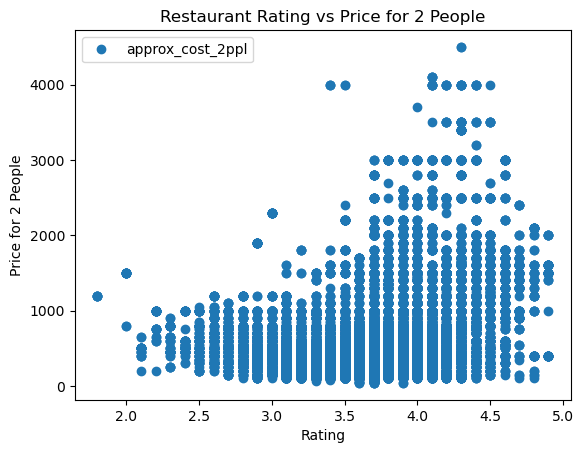

In [107]:
# Creating a scatterplot

df_test.plot(x = 'rate', y='approx_cost_2ppl',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Restaurant Rating vs Price for 2 People')  
plt.xlabel('Rating')  
plt.ylabel('Price for 2 People')  
plt.show()

In [109]:
# Reshaping the variables into NumPy arrays and putting them into separate objects.

X = df_test['rate'].values.reshape(-1,1)
y = df_test['approx_cost_2ppl'].values.reshape(-1,1)

In [111]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [113]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [115]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [117]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

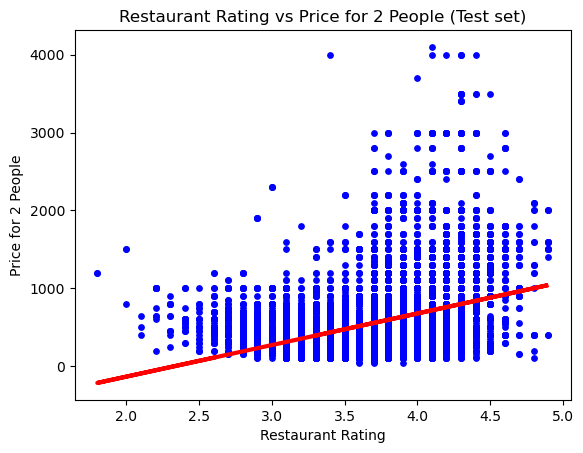

In [119]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Restaurant Rating vs Price for 2 People (Test set)')
plot_test.xlabel('Restaurant Rating')
plot_test.ylabel('Price for 2 People')
plot_test.show()

In [121]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [123]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[405.4770091]]
Mean squared error:  166221.4969934263
R2 score:  0.13493105026088348


In [125]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,200,392.661125
1,500,717.042732
2,600,676.495031
3,500,514.304227
4,600,635.947330
5,900,554.851928
6,180,757.590433
7,1500,473.756526
8,250,514.304227
9,600,595.399629


In [127]:
# Compare how the regression fits the training set
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [129]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [131]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[405.4770091]]
Mean squared error:  165709.2637332867
R2 score:  0.13452636022879427


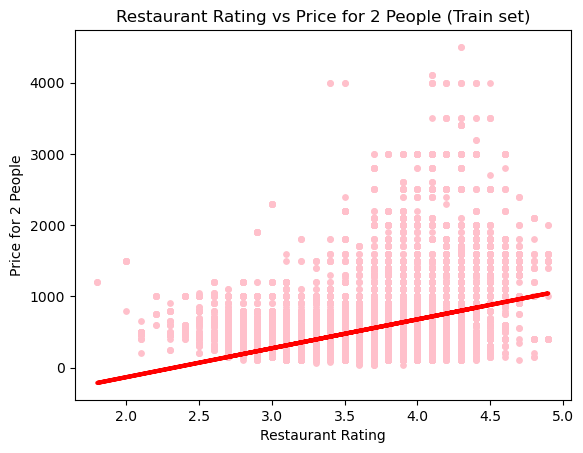

In [133]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='pink', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Restaurant Rating vs Price for 2 People (Train set)')
plot_test.xlabel('Restaurant Rating')
plot_test.ylabel('Price for 2 People')
plot_test.show()

### **After Removing Outliers:**

**Slope**:
   - The slope has slightly adjusted to `405.4770091` from previously being `405.85103449`. This minor change suggests that excluding outliers leads to a small adjustment in how the model perceives the relationship between ratings and prices.
   - Overall, the direction and magnitude of the relationship remain consistent, indicating that outliers were not strongly affecting the fundamental trend captured by the slope.

**Mean Squared Error (MSE)**:
   - The MSE has decreased slightly for both the test set (from `167759.77613076445` to `166221.4969934263`) and the training set (from `167040.0890543296` to `165709.2637332867`).
   - The reduction in MSE reflects that predictions are marginally closer to the actual values after removing outliers, suggesting a somewhat improved model fit.
   - While the improvement is limited, it indicates the reduction in extreme values helps the model better capture central tendencies, avoiding skew from outliers.

**R² Score**:
   - The R² score sees a minimal change, going from `0.13696423850336692` to `0.13493105026088348` for the test set and from `0.13315939561885826` to `0.13452636022879427` for the training set.
   - This consistency in the R² score signifies that while the dataset benefits from fewer extreme values, the variance explained by the model remains largely unchanged. This matches the observations with slopes and MSE, confirming the relationship's overall structure wasn't heavily impacted by outliers initially.

**Interpretation Compared to Before Removing Outliers**:
- Removing outliers has resulted in a slight improvement in predictive accuracy and reduced error rates, indicating better central performance across both datasets.
- However, improvements are subtle, and the core model metrics such as slope and R² mostly remain similar, implying that the outliers were not significantly affecting the underlying patterns.
- The model still represents a basic linear relationship, suggesting that factors beyond outliers (perhaps inherent data variability or omitted influential variables) are crucial in improving the model's ability to account for the variance in prices based on restaurant ratings.
- This analysis implies potential further avenues for refining the model, such as incorporating additional variables or exploring non-linear relationships to address unexplained variance.